### Introduction to Naive Bayes

Naive Bayes is a simple yet powerful classification algorithm based on Bayes' Theorem. It is particularly useful for text classification tasks such as spam detection or sentiment analysis. The algorithm assumes that the features (e.g., words in a text) are independent of each other — hence the term "naive."

Bayes' Theorem states that:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where:
- \( P(A|B) \) is the probability of event A (e.g., a message being spam) given that event B (e.g., certain words appear in the message) has occurred.
- \( P(B|A) \) is the likelihood of event B happening given A.
- \( P(A) \) is the prior probability of event A occurring (e.g., the general probability of a message being spam).
- \( P(B) \) is the probability of event B (the words occurring in a message).

In text classification, the algorithm calculates the probability that a piece of text belongs to a certain category (e.g., spam or not spam) based on the frequencies of words in the text. Despite its simplicity, Naive Bayes performs well in many real-world applications.


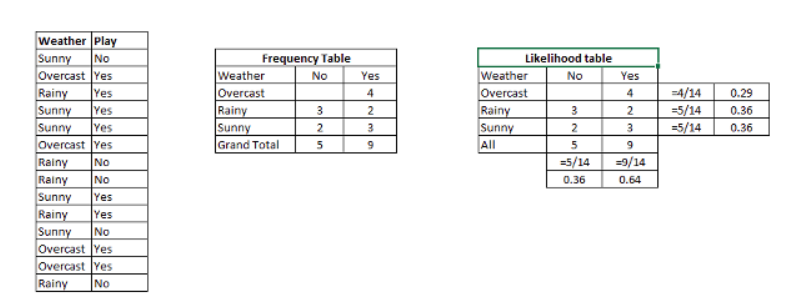

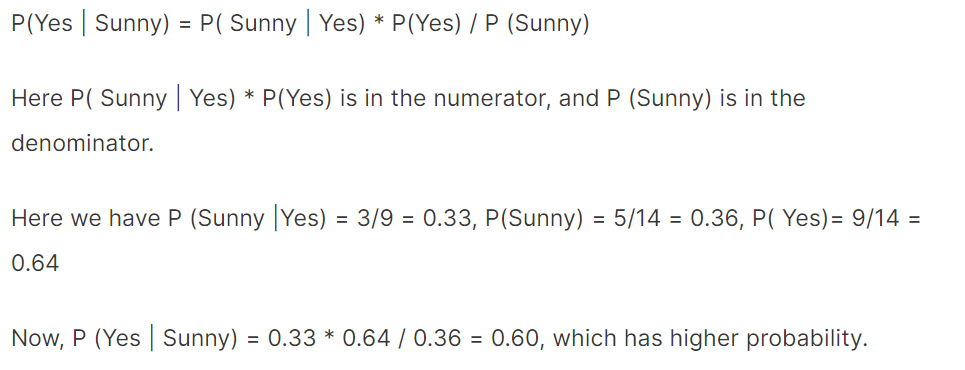

In [2]:
import pandas as pd
#import utils

In [3]:
import pandas as pd
# Dataset available using filepath 'smsspamcollection/SMSSpamCollection'
df = pd.read_table('SMSSpamCollection',
                   sep='\t',
                   header=None,
                   names=['label', 'sms_message'])

# Output printing out first 5 rows
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head() # returns (rows, columns)

(5572, 2)


,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Step 2.1: Bag of words ###

What we have here in our data set is a large collection of text data (5,572 rows of data). Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy.

Here we'd like to introduce the Bag of Words(BoW) concept which is a term used to specify the problems that have a 'bag of words' or a collection of text data that needs to be worked with. The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter.

Using a process which we will go through now, we can covert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrance of each word or token in that document.

For example:

Lets say we have 4 documents as follows:

`['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']`



Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns
[count vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) method which does the following:

* It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
* It counts the occurrance of each of those tokens.

** Please Note: **

* The CountVectorizer method automatically converts all tokenized words to their lower case form so that it does not treat words like 'He' and 'he' differently. It does this using the `lowercase` parameter which is by default set to `True`.

* It also ignores all punctuation so that words followed by a punctuation mark (for example: 'hello!') are not treated differently than the same words not prefixed or suffixed by a punctuation mark (for example: 'hello'). It does this using the `token_pattern` parameter which has a default regular expression which selects tokens of 2 or more alphanumeric characters.

* The third parameter to take note of is the `stop_words` parameter. Stop words refer to the most commonly used words in a language. They include words like 'am', 'an', 'and', 'the' etc. By setting this parameter value to `english`, CountVectorizer will automatically ignore all words(from our input text) that are found in the built in list of english stop words in scikit-learn. This is extremely helpful as stop words can skew our calculations when we are trying to find certain key words that are indicative of spam.

We will dive into the application of each of these into our model in a later step, but for now it is important to be aware of such preprocessing techniques available to us when dealing with textual data.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']
doc_array = count_vector.fit_transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [7]:
frequency_matrix = pd.DataFrame(doc_array,
                                columns = count_vector.get_feature_names_out())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [8]:
from sklearn.model_selection import train_test_split


X = df['sms_message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [9]:
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [10]:
#test same data but with naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(training_data,y_train)


MultinomialNB()

In [11]:
print(nb.score(testing_data,y_test))

0.9885139985642498


In [12]:
predictions=nb.predict(testing_data)

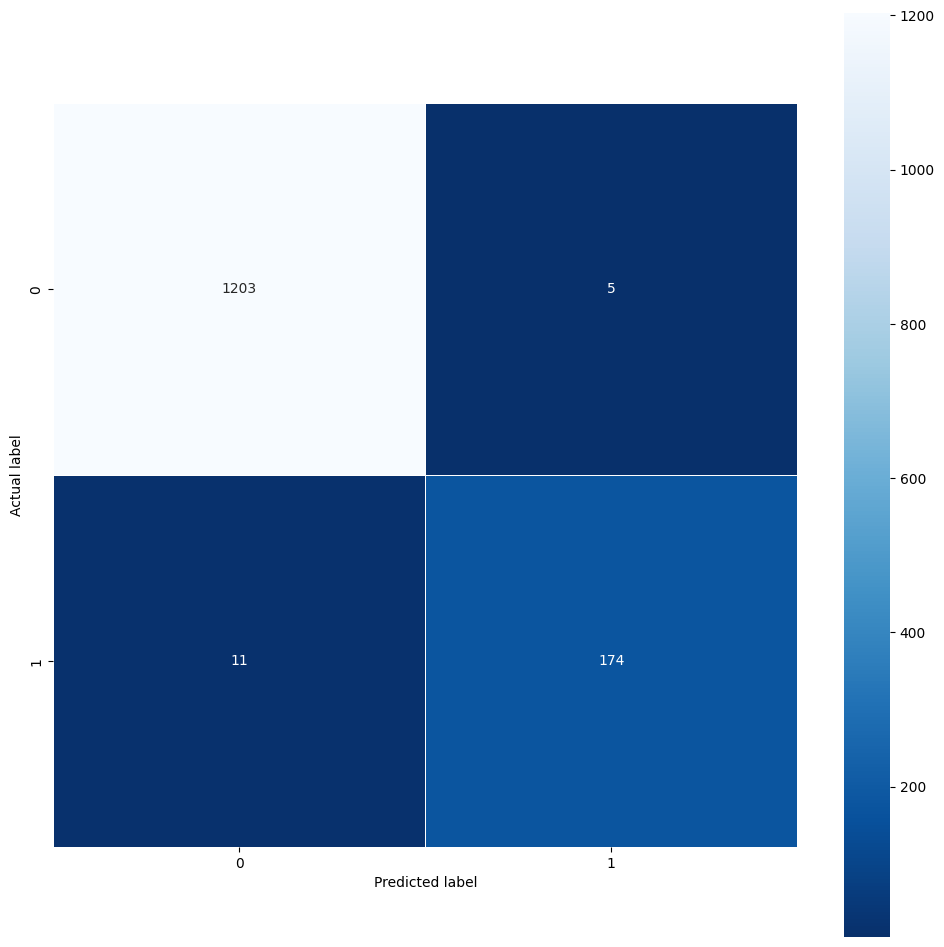

In [13]:
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cm = metrics.confusion_matrix(y_true=y_test,
                         y_pred = predictions,
                        labels = [0,1])

plt.figure(figsize=(12,12));
sns.heatmap(cm, annot=True,
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Task

In [14]:
# import the libraries
import numpy as np
import pandas as pd

# import the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
# seperate X and y variables


In [ ]:
# get dummy variables


In [ ]:
# Train test split


In [ ]:
# StandardScaler your data


In [ ]:
# Apply naive bayes and logistic regression and compare scores



In [ ]:
# score